In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [24]:
#read the file and clean the data
df = pd.read_csv('/Users/ritika/kaggle_projects/MSFOS/Data/df_15.csv')
df = df[['X0MATERIAL','ZDEPMENT','X0PLANT','X0CALDAY','X0CALMONTH','X0CALYEAR','qty']]
df = df[df['X0PLANT'].notna()]
df['X0CALDAY'] = pd.to_datetime(df['X0CALDAY'],format='%Y%m%d')
#df.info()
#df.head()
#df.columns

In [25]:
#Aggregate the data at Department level:
df_grp_dep =df.groupby(['ZDEPMENT','X0CALDAY'])['qty'].sum()
df_grp_dep=df_grp_dep.reset_index()
#df_grp_dep

In [26]:
#decompose the series

df_grp_dep=df_grp_dep[['X0CALDAY','qty']]


In [27]:
#Fill up the missing dates
r = pd.date_range(start=df_grp_dep.X0CALDAY.min(), end=df_grp_dep.X0CALDAY.max())
df_grp_dep=df_grp_dep.set_index('X0CALDAY').reindex(r).fillna(0.0).rename_axis('X0CALDAY').reset_index()

<AxesSubplot:xlabel='X0CALDAY'>

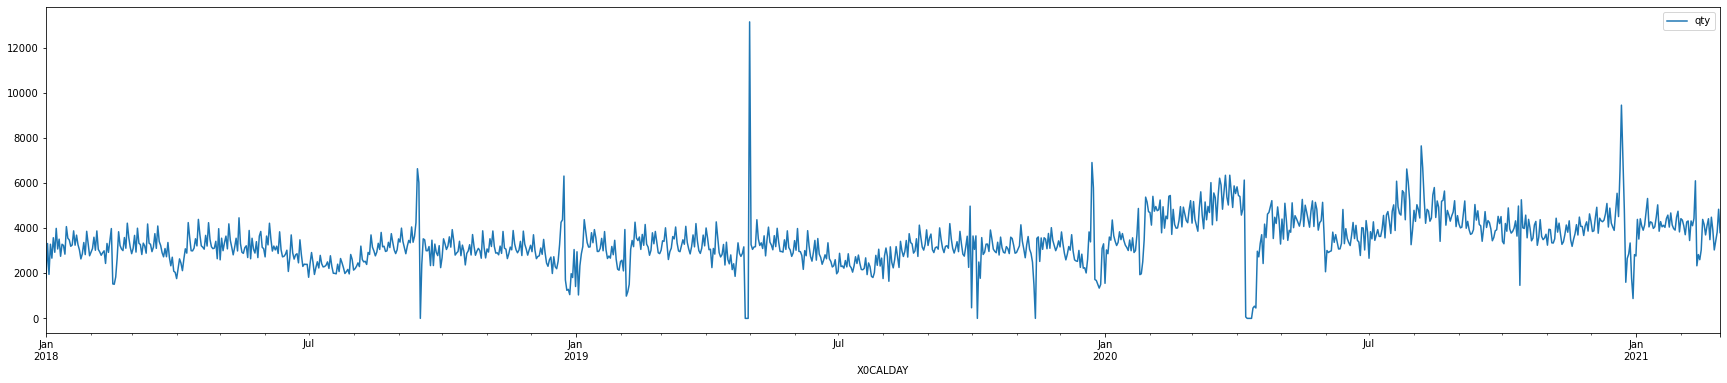

In [28]:
df_grp_dep.plot(kind='line',x='X0CALDAY',y='qty',figsize=(30, 6))

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df_grp_dep['qty'], model='additive',period=365)

<AxesSubplot:>

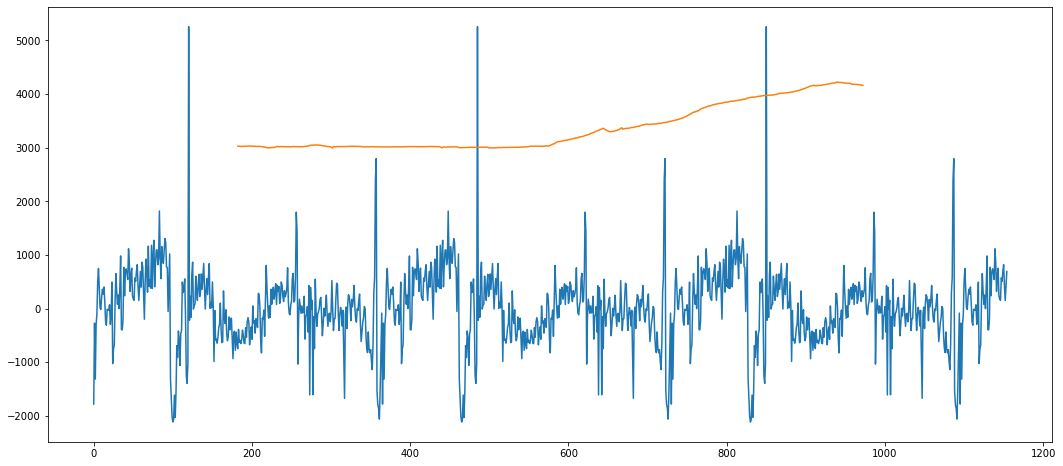

In [30]:
result.seasonal.plot()
result.trend.plot()

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8


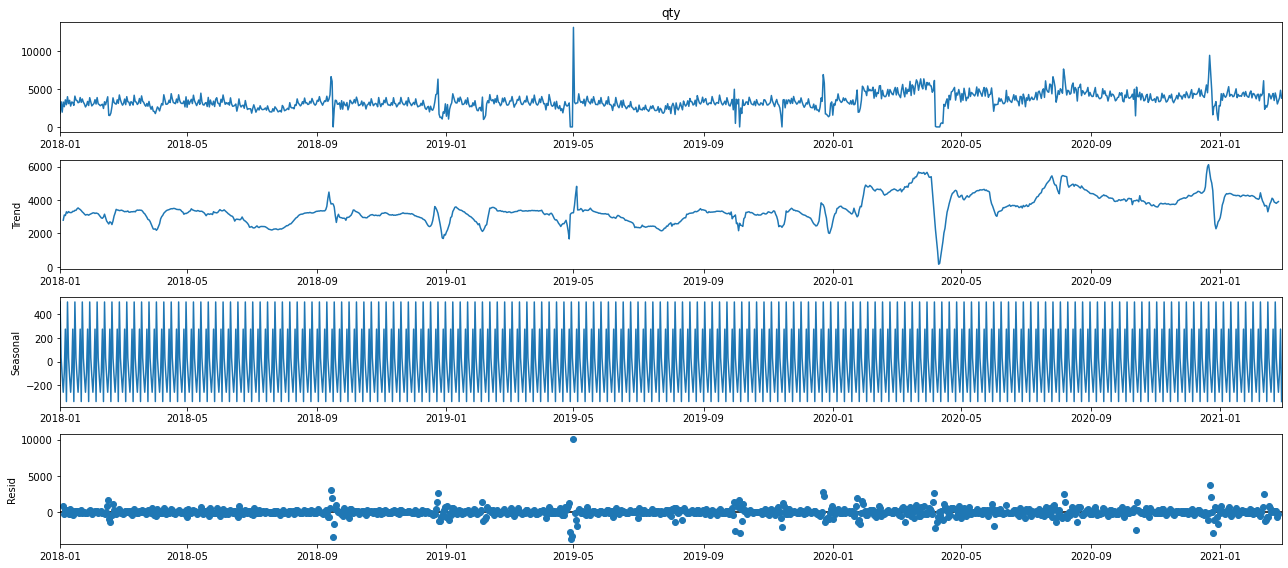

In [31]:
df_grp_dep=df_grp_dep.reset_index()
#df_grp_dep=df_grp_dep[df_grp_dep.X0CALDAY.between('2019-05-01','2019-05-30')]
df_grp_dep = df_grp_dep.set_index('X0CALDAY')

decomposition = sm.tsa.seasonal_decompose(df_grp_dep['qty'], model='additive')
fig=decomposition.plot()

In [32]:
#df_grp_dep=df_grp_dep['qty']
#df_grp_dep=pd.DataFrame(df_grp_dep)
type(df_grp_dep)

pandas.core.frame.DataFrame

Text(0, 0.5, 'qty')

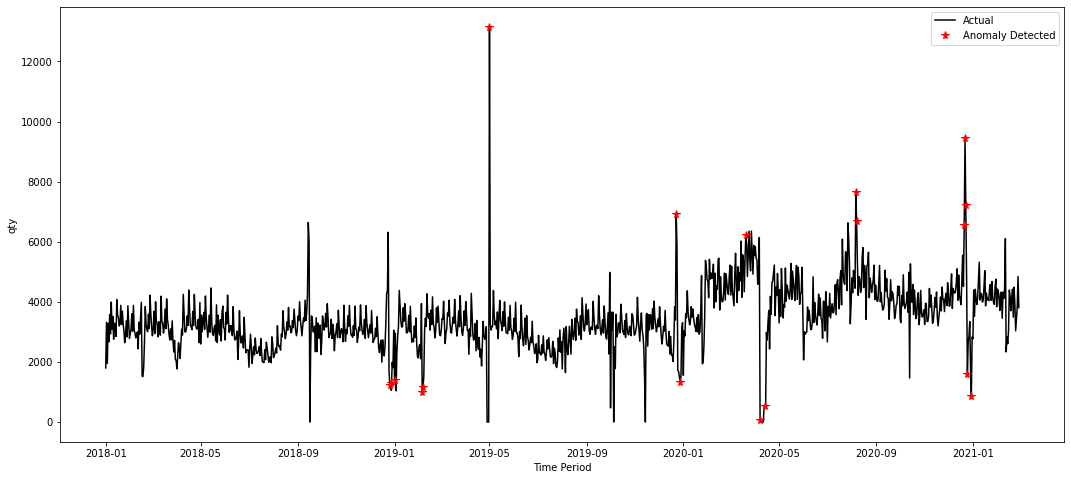

In [12]:
#Find outliers in the data
from sklearn.cluster import DBSCAN
clustering1 = DBSCAN(eps=40, min_samples=2).fit(np.array(df_grp_dep['qty']).reshape(-1,1))

labels = clustering1.labels_

outlier_pos = np.where(labels == -1)[0]

x = []; y = [];
for pos in outlier_pos:
    x.append(np.array(df_grp_dep['qty'])[pos])
    y.append(df_grp_dep['qty'].index[pos])
    
plt.plot(df_grp_dep['qty'].loc[df_grp_dep['qty'].index], 'k-')
plt.plot(y,x,'r*', markersize=8)  
plt.legend(['Actual', 'Anomaly Detected'])
plt.xlabel('Time Period')
#plt.xticks([0, 20, 40, 60, 80, 99],[df_grp_dep.index[0],df_grp_dep.index[20], df_grp_dep.index[40], df_grp_dep.index[60], df_grp_dep.index[80], df_grp_dep.index[99]] ,rotation=45)
plt.ylabel('qty')

In [13]:

from pyod.models.copod import COPOD
clf = COPOD()
clf.fit(df_grp_dep)

# get outlier scores
y_train_scores = clf.decision_scores_  # raw outlier scores on the train data
#y_test_scores = clf.decision_function(X_test)  # predict raw outlier scores on test
y_train_scores

array([8.72702023, 7.06404103, 7.52786259, ..., 7.12629907, 8.90057073,
       8.20381389])

In [14]:
from kats.detectors.outlier import OutlierDetector

outlier_detector = OutlierDetector(df_grp_dep, "additive")
outlier_detector
#outlier_detector.detector()
#outliers = outlier_detector.outliers
#outliers

AttributeError: 'DataFrame' object has no attribute 'time'

In [ ]:
#df_grp_dep.reset_index()

df_grp_dep=df_grp_dep.rename(columns={'X0CALDAY':'time','qty':'value'})

In [15]:
df_grp_dep=df_grp_dep.reset_index()

In [34]:
df_grp_dep

index     qty
X0CALDAY                 
2018-01-01      0  1800.0
2018-01-02      1  3321.0
2018-01-03      2  1952.0
2018-01-04      3  3289.0
2018-01-05      4  2672.0
...           ...     ...
2021-02-24   1150  3036.0
2021-02-25   1151  3426.0
2021-02-26   1152  3830.0
2021-02-27   1153  4842.0
2021-02-28   1154  3805.0

[1155 rows x 2 columns]

In [35]:
df_grp_dep

index     qty
X0CALDAY                 
2018-01-01      0  1800.0
2018-01-02      1  3321.0
2018-01-03      2  1952.0
2018-01-04      3  3289.0
2018-01-05      4  2672.0
...           ...     ...
2021-02-24   1150  3036.0
2021-02-25   1151  3426.0
2021-02-26   1152  3830.0
2021-02-27   1153  4842.0
2021-02-28   1154  3805.0

[1155 rows x 2 columns]

In [36]:
#Divide the data into train and test
df_grp_dep=df_grp_dep['qty']


In [37]:
df_grp_dep=df_grp_dep.reset_index()

In [38]:
df_grp_dep

X0CALDAY     qty
0    2018-01-01  1800.0
1    2018-01-02  3321.0
2    2018-01-03  1952.0
3    2018-01-04  3289.0
4    2018-01-05  2672.0
...         ...     ...
1150 2021-02-24  3036.0
1151 2021-02-25  3426.0
1152 2021-02-26  3830.0
1153 2021-02-27  4842.0
1154 2021-02-28  3805.0

[1155 rows x 2 columns]

In [39]:
df_grp_dep_train=df_grp_dep[df_grp_dep['X0CALDAY']<='2021-02-01']

In [157]:
df_grp_dep_train['X0CALDAY'].max()

Timestamp('2021-02-01 00:00:00')

<AxesSubplot:xlabel='X0CALDAY'>

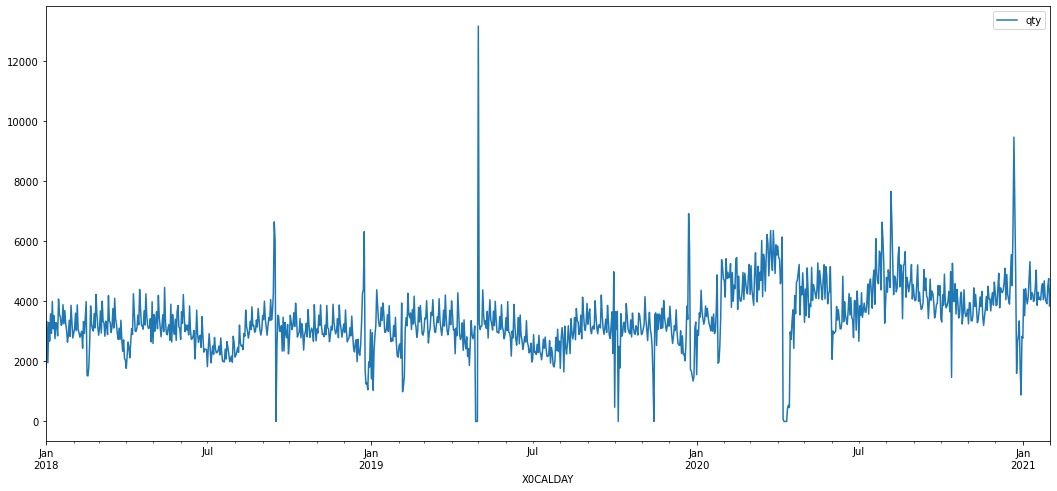

In [40]:
df_grp_dep_train.plot(x='X0CALDAY',y='qty')

In [43]:
#Building visualizations
import plotly.express as px
fig = px.line(df_grp_dep_train,x='X0CALDAY',y='qty')
fig.show()

In [45]:
df_grp_dep_train=df_grp_dep_train.set_index('X0CALDAY')

In [47]:
#Performing dickey fullers test
from statsmodels.tsa.stattools import adfuller
def ad_test(df_grp_dep_train):
     dftest = adfuller(df_grp_dep_train, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations",dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df_grp_dep_train['qty'])

1. ADF :  -3.4065547603355495
2. P-Value :  0.010737439538835644
3. Num Of Lags :  20
4. Num Of Observations 1107
5. Critical Values :
	 1% :  -3.436270983129607
	 5% :  -2.8641544150183553
	 10% :  -2.5681619941180744


In [50]:
#Fit the arima model 
import pmdarima as pmd
def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model
arima_model = arimamodel(df_grp_dep_train)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=18377.945, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=18904.722, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=18442.912, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=18632.477, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=21665.166, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=18365.946, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=18370.033, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=18363.322, Time=0.26 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=18362.956, Time=0.14 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=18335.391, Time=0.19 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=18323.064, Time=0.22 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=18324.912, Time=0.63 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=18334.529, Time=0.32 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(5,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1128
Model:               SARIMAX(5, 0, 0)   Log Likelihood               -9154.532
Date:                Tue, 05 Oct 2021   AIC                          18323.064
Time:                        20:30:39   BIC                          18358.261
Sample:                             0   HQIC                         18336.363
                               - 1128                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    728.3130    100.444      7.251      0.000     531.446     925.180
ar.L1          0.3782      0.015     25.985      0.000       0.350       0.407
ar.L2          0.1777      0.021      8.367      0.000       0.136       0.219
ar.L3          0.0032      0.025      0.128      0.898      -0.045       0.052
ar.L4          0.1160      0.026      4.475      0.000       0.065       0.167
ar.L5          0.1122      0.028      4.016      0.000       0.057       0.167
sigma2       6.55e+05   1.01e+04     65.020      0.000    6.35e+05    6.75e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             90222.07
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.88   Skew:                             2.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        46.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
df_grp_dep_test=df_grp_dep[df_grp_dep['X0CALDAY']>='2021-02-01']
df_grp_dep_test['ARIMA'] = arima_model.predict(len(df_grp_dep_test))
df_grp_dep_test

<ipython-input-55-322dee8790cf>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



X0CALDAY     qty        ARIMA
1127 2021-02-01  4424.0  4058.877580
1128 2021-02-02  4360.0  4117.304305
1129 2021-02-03  4101.0  3999.091646
1130 2021-02-04  3712.0  3928.776871
1131 2021-02-05  4278.0  3905.010567

In [59]:
#performance check
import statistics as st
def mean_absolute_percentage_error(timeseries):
    error = st.mean((df_grp_dep_test['qty']- df_grp_dep_test.ARIMA)/df_grp_dep_test['qty'])*100
    return error

mean_absolute_percentage_error(df_grp_dep_test)

3.130834842720259

In [60]:
df_grp_dep_test

X0CALDAY     qty        ARIMA
1127 2021-02-01  4424.0  4058.877580
1128 2021-02-02  4360.0  4117.304305
1129 2021-02-03  4101.0  3999.091646
1130 2021-02-04  3712.0  3928.776871
1131 2021-02-05  4278.0  3905.010567
1132 2021-02-06  4324.0  3848.950815
1133 2021-02-07  3455.0  3816.153143
1134 2021-02-08  4323.0  3772.290755
1135 2021-02-09  4112.0  3739.049585
1136 2021-02-10  4433.0  3709.411390
1137 2021-02-11  6104.0  3682.061742
1138 2021-02-12  2333.0  3657.579029
1139 2021-02-13  2830.0  3634.588524
1140 2021-02-14  2604.0  3614.288911
1141 2021-02-15  3038.0  3595.950939
1142 2021-02-16  4391.0  3579.427064
1143 2021-02-17  4172.0  3564.441164
1144 2021-02-18  3703.0  3550.845010
1145 2021-02-19  4112.0  3538.582967
1146 2021-02-20  4421.0  3527.507825
1147 2021-02-21  3492.0  3517.504978
1148 2021-02-22  4489.0  3508.456570
1149 2021-02-23  3920.0  3500.274107
1150 2021-02-24  3036.0  3492.879502
1151 2021-02-25  3426.0  3486.197314
1152 2021-02-26  3830.0  3480.158323
1153 2021-02-27  4842.0  3474.699212
1154 2021-02-28  3805.0  3469.764506